# **IMPORT DATA PROCEDURE OF ECG SIGNAL**

**INPUT LIBRARIES**

In [1654]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
import math 
from tabulate import tabulate
from cmath import exp,pi

**INPUT FILE DATA**

In [1655]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA OVERVIEW**

In [2139]:
column_names =['ECG']
data = pd.read_csv('/content/drive/MyDrive/07311840000011_Mohammad Daffa Gunawan/HASIL/Data Subjek/AKBAR/AKBAR ECG 3.txt',names=column_names)
data["sample interval"] = np.arange(np.size(data))
data["elapsed time"] = (data["sample interval"])*(1/250)
x = data["elapsed time"]
ECG = data["ECG"]
data

,ECG,sample interval,elapsed time
0,1.640732,0,0.000
1,1.650402,1,0.004
2,1.717289,2,0.008
3,1.660879,3,0.012
4,1.611721,4,0.016
...,...,...,...
74875,1.501318,74875,299.500
74876,1.423150,74876,299.504
74877,1.447325,74877,299.508
74878,1.443296,74878,299.512


**SAMPLING FREQUENCY**

In [2140]:
fs=int(round(1/(data.iloc[1,2]-data.iloc[0,2])))
fs

250

**INPUT SIGNAL MORPHOLOGY**

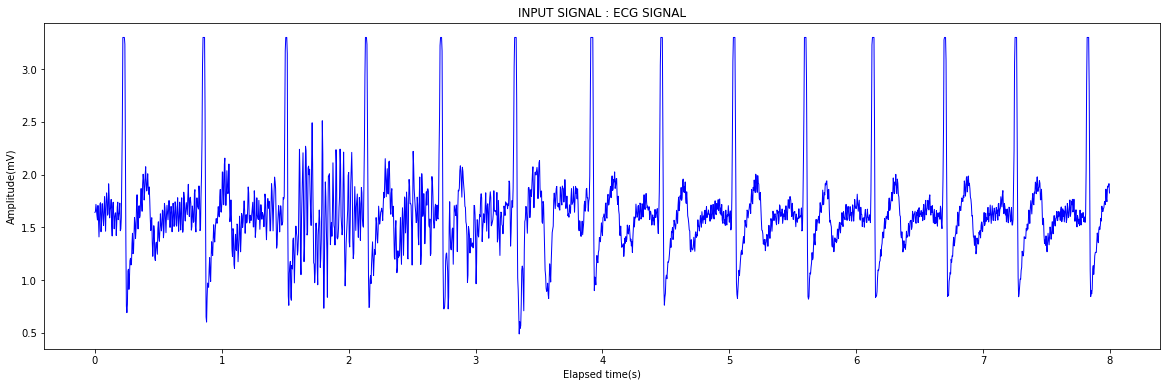

In [2141]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((x)[0:2000],ECG[0:2000],color='b',linewidth=1)
plot.title('INPUT SIGNAL : ECG SIGNAL')
plot.xlabel("Elapsed time(s)")
plot.ylabel("Amplitude(mV)")
fig.set_size_inches(w=20,h=6)

**OFFSET VOLTAGE CALCULATION PROCEDURE**

In [2142]:
sum = 0
for n in range(len(ECG)):
  sum += ECG[n]
offset_voltage = sum/len(ECG)
offset_voltage

1.6387611968188525

**BASELINE RESTORATION PROCEDURE**

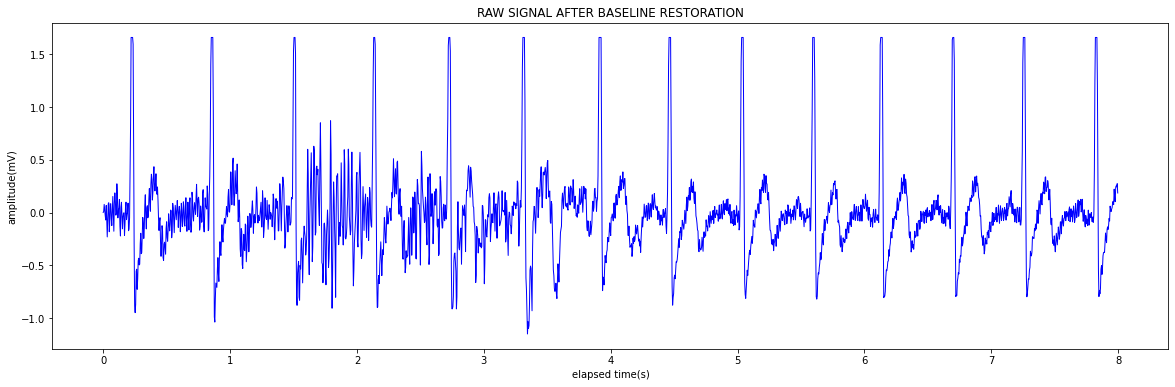

In [2143]:
y1 = ECG - offset_voltage

fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((x)[0:2000],y1[0:2000],color='b',linewidth=1)
plot.title('RAW SIGNAL AFTER BASELINE RESTORATION')
plot.xlabel("elapsed time(s)")
plot.ylabel("amplitude(mV)")
fig.set_size_inches(w=20,h=6)

# **PROCESSING PROCEDURE OF ECG SIGNAL**

**Lowpass Filter With Butterworth Filter Orde-2**

In [2144]:
5# INPUT FREQUENCY CUT-OFF FOR LOWPASS FILTER
fc_lpf=input("FREQUENCY CUT-OFF FOR LOWPASS FILTER :")
fc_lpf=float(fc_lpf)

# PROTOCOL FOR DATA [-N]
jumlahdata = int(np.size(y1))
lpf_ecg = np.zeros(jumlahdata)
for n in range (3):
  lpf_ecg[-n] = lpf_ecg[0]
  y1[-n] = y1[0]
# PARAMETER DECLARATION FOR LOWPASS FILTER PROCEDURE
T = 1/fs
w = 2*math.pi*fc_lpf
a0 = w**2
a1 = 2*(w**2)
b1 = ((8/(T**2))-(2*(w**2)))
c0 = ((4/(T**2))-((2*(math.sqrt(2))*w)/T)+(w**2))
c1 = ((4/(T**2))+((2*(math.sqrt(2))*w)/T)+(w**2))

# BUTTERWORTH LOWPASS FILTER ORDE-2 EQUATION IMPLEMENTATION FOR LPF PROCEDURE
for n in range (jumlahdata):
  lpf_ecg[n] = ((b1*lpf_ecg[n-1])-(c0*lpf_ecg[n-2])+(a0*y1[n])+(a1*y1[n-1])+(a0*y1[n-2]))/c1
(lpf_ecg)*2

FREQUENCY CUT-OFF FOR LOWPASS FILTER :11


array([ 2.48031628e-04,  9.52896392e-04,  4.63616974e-03, ...,
       -8.02368644e-01, -7.22167332e-01, -6.43718873e-01])

**ECG Signal Morphology After LPF**

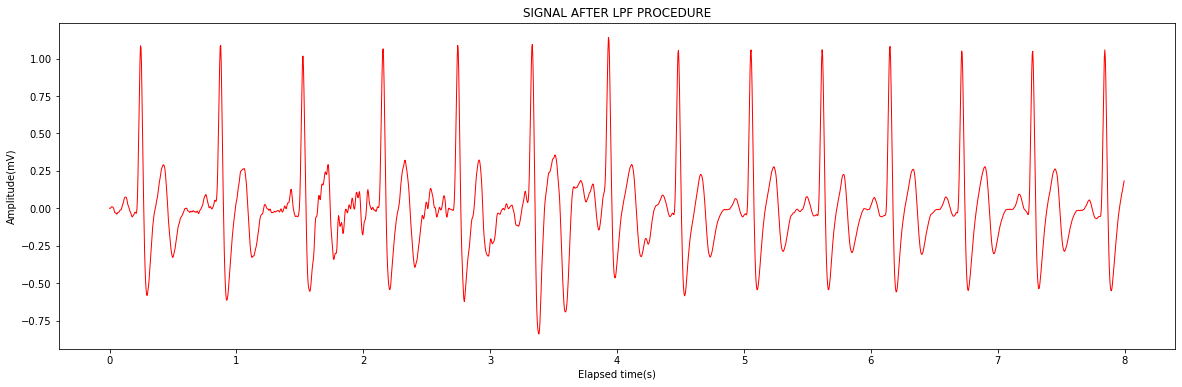

In [2145]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((x)[0:2000],lpf_ecg[0:2000],color='r',linewidth=1)
plot.title('SIGNAL AFTER LPF PROCEDURE')
plot.xlabel("Elapsed time(s)")
plot.ylabel("Amplitude(mV)")
fig.set_size_inches(w=20,h=6)

**Highpass Filter With Butterworth Filter Orde-2**

In [2146]:
# INPUT FREQUENCY CUT-OFF FOR HIGHPASS FILTER
fc_hpf=input("FREQUENCY CUT-OFF FOR HIGHPASS FILTER :")
fc_hpf=float(fc_hpf)

# PROTOCOL FOR DATA [-N]
hpf_ecg = np.zeros(np.size(lpf_ecg))
for n in range (np.size(lpf_ecg)):
  hpf_ecg[-n] = hpf_ecg[0]

# PARAMETER DECLARATION FOR HIGHPASS FILTER PROCEDURE
T = 1/fs
w = 2*math.pi*fc_hpf
e0 = 4*T
e1 = 8*T
e2 = 4*T
d0 = ((2*(w**2)*(T**2))-8)
d1 = (((w**2)*(T**2))-(2*(math.sqrt(2))*T*w)+4)
d2 = ((w**2)*(T**2))+(2*(math.sqrt(2))*T*w)+4

# BUTTERWORTH HIGHPASS FILTER ORDE-2 EQUATION IMPLEMENTATION FOR HPF PROCEDURE
for n in range (np.size(lpf_ecg)):
  hpf_ecg[n] = ((e0*lpf_ecg[n])-(e1*lpf_ecg[n-1])+(e2*lpf_ecg[n-2])-(d0*hpf_ecg[n-1])-(d1*hpf_ecg[n-2]))/d2
hpf_ecg

FREQUENCY CUT-OFF FOR HIGHPASS FILTER :5


array([0.00103498, 0.00070943, 0.00043202, ..., 0.00025927, 0.00054204,
       0.00076778])

In [2147]:
# PROTOCOL FOR DATA [-N]
hpf_ecg = np.zeros(np.size(lpf_ecg))
for n in range (np.size(lpf_ecg)):
  hpf_ecg[-n] = hpf_ecg[0]

In [2148]:
# PARAMETER DECLARATION FOR HIGHPASS FILTER PROCEDURE
T = 1/fs
w = 2*math.pi*fc_hpf
e0 = 4*T
e1 = 8*T
e2 = 4*T
d0 = ((2*(w**2)*(T**2))-8)
d1 = (((w**2)*(T**2))-(2*(math.sqrt(2))*T*w)+4)
d2 = ((w**2)*(T**2))+(2*(math.sqrt(2))*T*w)+4

# BUTTERWORTH HIGHPASS FILTER ORDE-2 EQUATION IMPLEMENTATION FOR HPF PROCEDURE
for n in range (np.size(lpf_ecg)):
  hpf_ecg[n] = ((e0*lpf_ecg[n])-(e1*lpf_ecg[n-1])+(e2*lpf_ecg[n-2])-(d0*hpf_ecg[n-1])-(d1*hpf_ecg[n-2]))/d2
hpf_ecg

array([0.00103498, 0.00070943, 0.00043202, ..., 0.00025927, 0.00054204,
       0.00076778])

**ECG Signal Morphology After HPF**

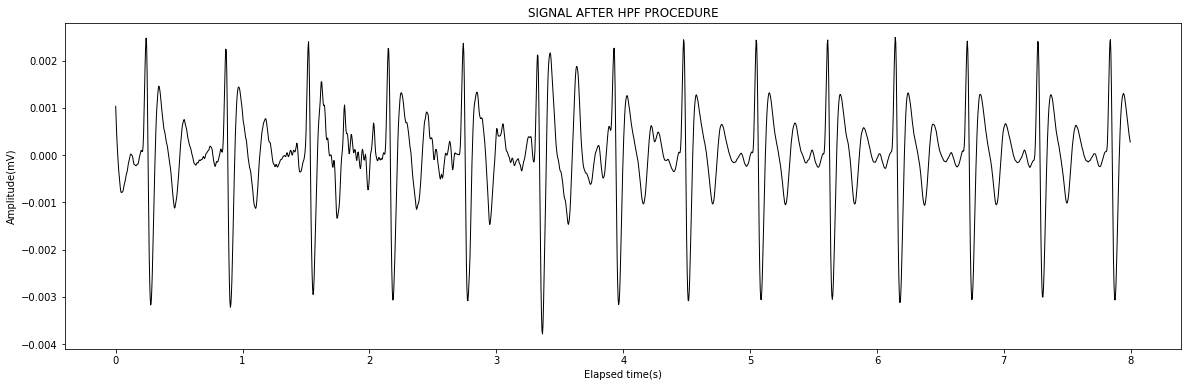

In [2149]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((x)[0:2000],hpf_ecg[0:2000],color='black',linewidth=1)
plot.title('SIGNAL AFTER HPF PROCEDURE')
plot.xlabel("Elapsed time(s)")
plot.ylabel("Amplitude(mV)")
fig.set_size_inches(w=20,h=6)

**Derivative Procedure For ECG Signal**

In [2150]:
# DERIVATIVE PROCEDURE PAN TOMPKINS METHOD
drv=np.zeros(np.size(hpf_ecg))
for n in range (np.size(hpf_ecg)-2):
  drv[n]= (1/8)*(-(hpf_ecg[n-2]) - (2*hpf_ecg[n-1]) + (2*hpf_ecg[n+1]) + (hpf_ecg[n+2]))

**ECG Signal Morphology After Derivative Procedure**

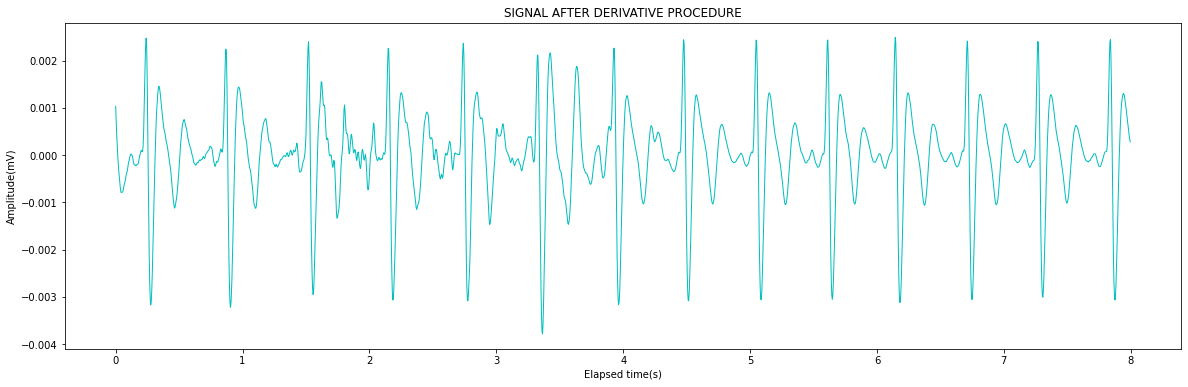

In [2151]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((x)[0:2000],hpf_ecg[0:2000],color='c',linewidth=1)
plot.title('SIGNAL AFTER DERIVATIVE PROCEDURE')
plot.xlabel("Elapsed time(s)")
plot.ylabel("Amplitude(mV)")
fig.set_size_inches(w=20,h=6)

**Squaring Procedure For ECG Signal**

In [2152]:
# SQUARING PROCEDURE METHOD
sqr=np.zeros(np.size(drv))
for n in range (0,np.size(drv)):
  sqr[n]=(drv[n])**2

**ECG Signal Morphology After Squaring Procedure**

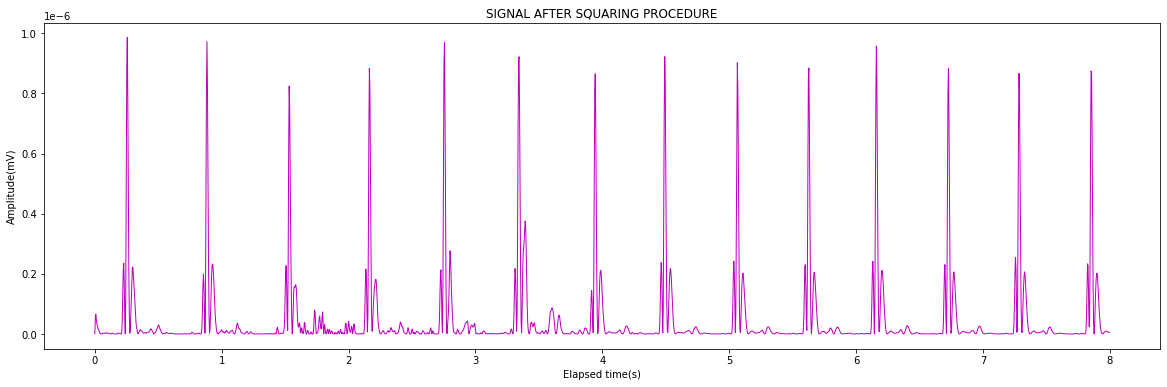

In [2153]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((x)[0:2000],sqr[0:2000],color='m',linewidth=1)
plot.title('SIGNAL AFTER SQUARING PROCEDURE')
plot.xlabel("Elapsed time(s)")
plot.ylabel("Amplitude(mV)")
fig.set_size_inches(w=20,h=6)

**Moving Average (MAV) Procedure For ECG Signal**

In [2154]:
w=10
mav=np.zeros (np.size(sqr))
for n in range (0,np.size(sqr)):
  for i in range (w):
    mav[n]=mav[n]+sqr[n-i]
  mav[n]=(mav[n]/w)

**ECG Signal Morphology After MAV Procedure**

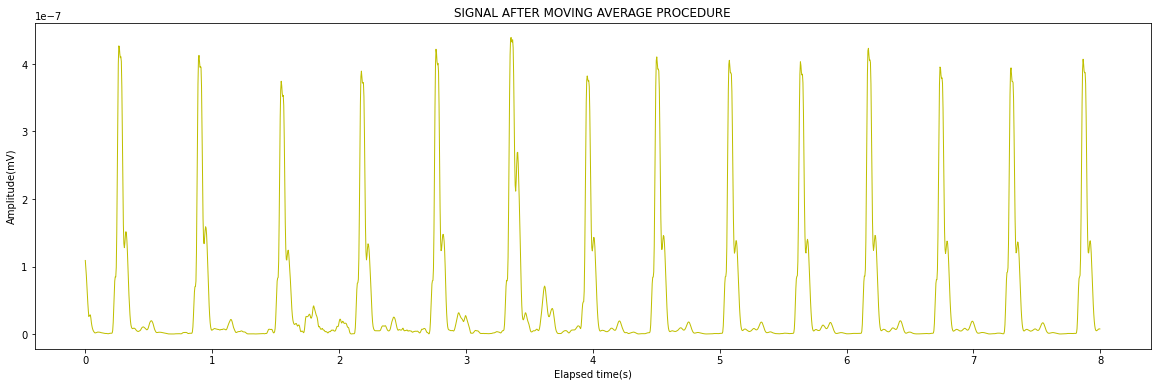

In [2155]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((x)[0:2000],mav[0:2000],color='Y',linewidth=1)
plot.title('SIGNAL AFTER MOVING AVERAGE PROCEDURE')
plot.xlabel("Elapsed time(s)")
plot.ylabel("Amplitude(mV)")
fig.set_size_inches(w=20,h=6)

# **HEART RATE CALCULATION PROCEDURE**

**Threshold Procedure For ECG Signal**

In [2156]:
tinggi=mav[0]
tinggi

1.089517870811335e-07

In [2157]:
temp4=mav[0]
tinggi=np.zeros(np.size(mav))
for n in range (np.size(mav)-1):
  if (temp4 < mav[n]).all():
    tinggi[n]=mav[n]
tinggi
thres=tinggi*0.5
thrqrs=np.zeros(np.size(mav))
for n in range (np.size(mav)-1):
  if (mav[n]>=thres).all():
    thrqrs[n]=1
  elif (mav[n]<thres).all():
    thrqrs[n]=0
thrqrs

array([0., 0., 0., ..., 0., 0., 0.])

**ECG Signal Morphology After Thresholding Procedure**

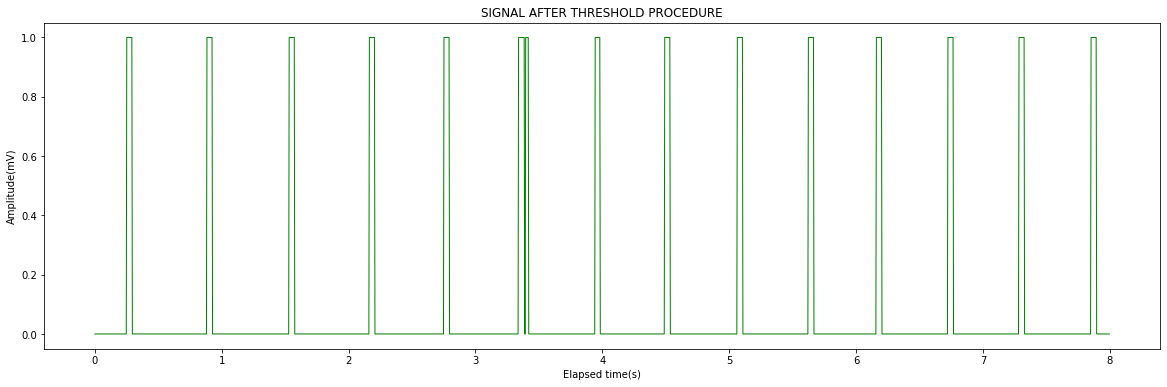

In [2158]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((x)[0:2000],thrqrs[0:2000],color='green',linewidth=1)
plot.title('SIGNAL AFTER THRESHOLD PROCEDURE')
plot.xlabel("Elapsed time(s)")
plot.ylabel("Amplitude(mV)")
fig.set_size_inches(w=20,h=6)


**Calculation Procedure To Find Number Of RtoR**

In [2159]:
ptp=0
waktu=np.zeros(np.size(thrqrs))
selisih=np.zeros(np.size(thrqrs))
interval=np.zeros(np.size(thrqrs))
for n in range (np.size(thrqrs)-1):
  if thrqrs[n]<thrqrs[n+1]:
    waktu[ptp]= n/fs;
    selisih[ptp]= waktu[ptp]-waktu[ptp-1];
    ptp+=1
ptp=ptp-1

**Calculation Procedure To Find Amount Of R**

In [2160]:
R=0
peak=np.zeros(np.size(thrqrs))
for n in range(np.size(thrqrs)-1):
  if (thrqrs[n]==1) and (thrqrs[n-1]==0):
    peak[R] = n
    R+=1

**BPM CALCULATION**

In [2161]:
temp=0
interval = np.zeros(np.size(thrqrs))
BPM = np.zeros (np.size(thrqrs))
for n in range (ptp):
  interval[n] = (peak[n]-peak[n-1])*(1/fs)
  BPM[n]=60/selisih[n]
  temp=temp+BPM[n]
rata=temp/(ptp)

**Heart Rate Calculation Procedure Result**

In [2162]:
data = [["NUMBER OF RtoR CALCULATIONS",ptp], 
        ["CALCULATION OF THE AMOUNT OF R",R], 
        ["HEART RATE",rata]] 

col_names = ["DESCRIPTION", "SCORE"] 
print (tabulate(data, headers=col_names))

DESCRIPTION                        SCORE
------------------------------  --------
NUMBER OF RtoR CALCULATIONS     455
CALCULATION OF THE AMOUNT OF R  456
HEART RATE                       94.9964


# **HEART RATE VARIABILITY ANALYSIS**

**Procedure To Find Out Of Frequency Sampling For HRV**

In [2163]:
fsHRV = rata/60
fsHRV

1.5832738857846103

**Tachogram Morphology Of HRV**

Text(0, 0.5, 'bpm')

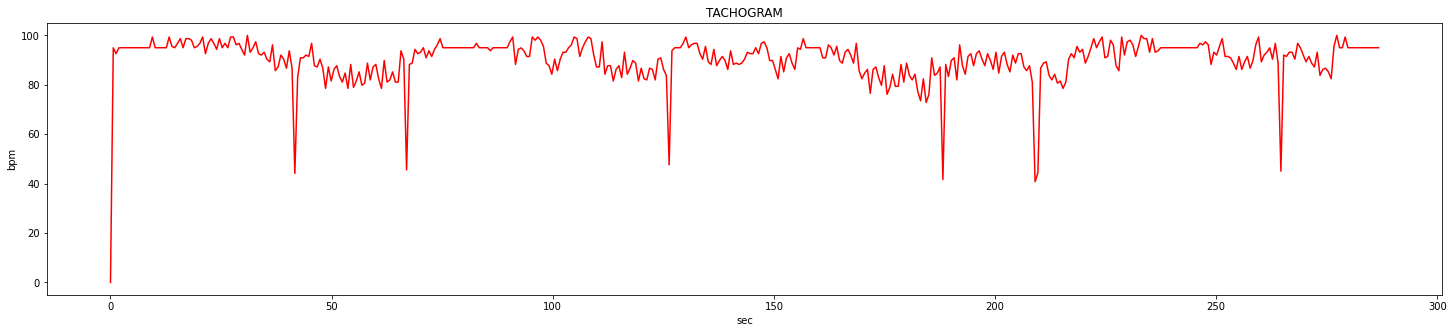

In [2164]:
bpm_rr = np.zeros(ptp)
for n in range (1, ptp):
  bpm_rr[n] = 60/selisih[n]
  if bpm_rr[n]>100: 
    bpm_rr[n]=rata
n = np.arange(0,ptp,1,dtype=int)
plot.rcParams["figure.figsize"] = (25,5)
plot.plot(n/fsHRV,bpm_rr,color='r')
plot.title("TACHOGRAM")
plot.xlabel("sec")
plot.ylabel("bpm")

In [2165]:
data = {'Time': n/fsHRV,'RR':bpm_rr}
df = pd.DataFrame(data,columns=['Time','RR'])
df = df.reset_index(drop=True)
df


,Time,RR
0,0.000000,0.000000
1,0.631603,94.936709
2,1.263205,92.592593
3,1.894808,94.936709
4,2.526411,94.996433
...,...,...
450,284.221198,94.996433
451,284.852800,94.996433
452,285.484403,94.996433
453,286.116006,94.996433


**Baseline Restoration Procedure**

In [2166]:
sum = 0
for n in range(len(bpm_rr)):
  sum += bpm_rr[n]
offset_voltageHRV = sum/len(bpm_rr)
offset_voltageHRV

90.33387265394323

**Tachogram Morphology Of HRV After Baseline Restoration**

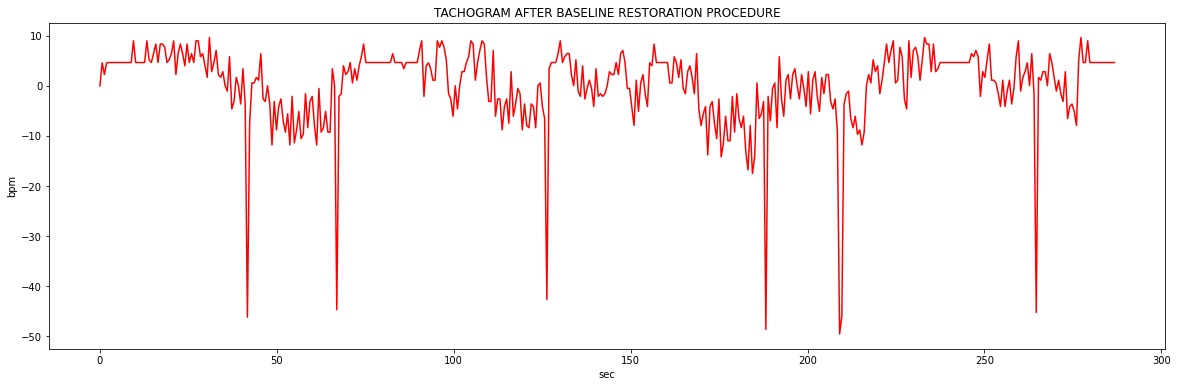

In [2167]:
bpm_rr1 = np.zeros(ptp)
for n in range (1, ptp):
  bpm_rr1[n] = bpm_rr[n] - offset_voltageHRV


n = np.arange(0,ptp,1,dtype=int)
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot(n/fsHRV,bpm_rr1,color='r')
plot.title("TACHOGRAM AFTER BASELINE RESTORATION PROCEDURE")
plot.xlabel("sec")
plot.ylabel("bpm")
fig.set_size_inches(w=20,h=6)

**Histogram Morphology Of HRV**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0, 0.5, 'bpm')

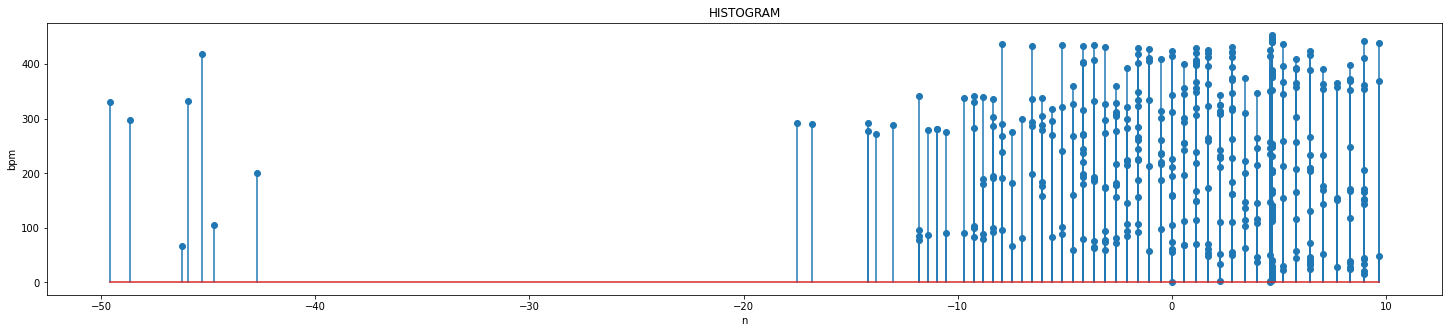

In [2168]:
mark = np.zeros(ptp)
# for k in range (1,ptp-1):
for k in (n+1 for n in range(ptp-1)):
  mark[k]=0

# for l in range (1,ptp-1):
for l in (n+1 for n in range(ptp-1)):
  number=1
  mark[l]=1
  for k in range (1,ptp-1):
    if mark[k]==0:
      if bpm_rr1[l]==bpm_rr1[k]:
        mark[k]=1
    number+=1

n = np.arange(0,number,1,dtype=int)
l = np.arange(0,ptp-1,1,dtype=int)
plot.rcParams["figure.figsize"] = (25,5)
plot.stem(bpm_rr1[l],n)
plot.title("HISTOGRAM")
plot.xlabel("n")
plot.ylabel("bpm")

**Poincare Plot Morphology Of HRV**

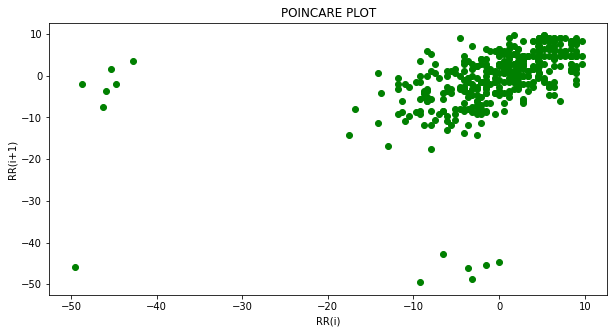

In [2169]:
for n in range (ptp):
  n = np.arange(0,ptp-1,1,dtype=int)
plot.figure(figsize=((10,5)))
plot.plot(bpm_rr1[n], bpm_rr1[n+1],'go')
plot.xlabel("RR(i)")
plot.ylabel("RR(i+1)")
plot.title("POINCARE PLOT")
plot.show()

# **TIME DOMAIN ANALYSIS OF HEART RATE VARIABILITY**

**RMSSD PARAMETER OF TIME DOMAIN ANALYSIS**

In [ ]:
RR_RMSSD=0
for n in range (ptp):
  RMSSD = RR_RMSSD+((selisih[ptp+1]-selisih[ptp])**2)

**SDNN PARAMETER OF TIME DOMAIN ANALYSIS**

In [ ]:
RR_SDNN=0
RR_SDNN=np.zeros(ptp)
for n in range (ptp):
  SDNN = RR_SDNN[n]+(((selisih[n])-rata)**2)

**SDSD PARAMETER OF TIME DOMAIN ANALYSIS**

In [ ]:
RR1_SDSD = 0
RR1_SDSD = np.zeros(ptp)
for n in range (ptp):
  dif = RR1_SDSD[n]+abs(selisih[n]-selisih[n+1])
RRdif = dif/(ptp-1)

In [ ]:
RR_SDSD = 0
RR_SDSD = np.zeros(ptp)
for n in range (ptp):
  SDSD = RR_SDSD[n]+(((abs(selisih[n]-selisih[n+1]))-RRdif)**2)

**PNN50 PARAMETER OF TIME DOMAIN ANALYSIS**

In [ ]:
RR_NN50 = 0
for n in range (ptp):
  if (selisih[n]>0.05):
    RR_NN50 + abs(selisih[n+1]-selisih[n])
  else:
    RR_NN50
  NN50 = RR_NN50+abs(selisih[n+1]-selisih[n])
pNN50 = (NN50/(ptp-1))*100

**TIME DOMAIN ANALYSIS RESULT**

In [ ]:
data = [["SDNN",math.sqrt(SDNN/(ptp-1))], 
        ["RMSSD",math.sqrt(RMSSD/ptp)], 
        ["SDSD",math.sqrt(SDSD/(ptp-1))],
        ["PNN50",pNN50]] 

col_names = ["TIME DOMAIN PARAMETER ANALYSIS","SCORE"] 
print (tabulate(data, headers=col_names))

TIME DOMAIN PARAMETER ANALYSIS         SCORE
--------------------------------  ----------
SDNN                              4.44591
RMSSD                             0.0326023
SDSD                              0.00297753
PNN50                             0.013913


# **FREQUENCY DOMAIN ANALYSIS OF HEART RATE VARIABILITY**

In [ ]:
D = np.fft.fft(bpm_rr)
D_mag = np.abs(D)/len(bpm_rr)

In [ ]:
def padding( x):
      log = np.log2(len(x))
      return np.pad(
          x, (0, int(2 ** ((log - log % 1) + 1) - len(x))), mode="constant"
      ).flatten()

def FFT(x):

      if np.log2(len(x)) % 1 > 0:
          x = padding(x)

      x = np.asarray(x, dtype=float)
      N = x.shape[0]

      N_min = min(N, 2)

      # DFT on all length-N_min sub-problems at once
      n = np.arange(N_min)
      k = n[:, None]
      W = np.exp(-2j * np.pi * n * k / N_min)
      X = np.dot(W, x.reshape((N_min, -1)))

      # Recursive calculation all at once
      while X.shape[0] < N:
          X_even = X[:, : int(X.shape[1] / 2)]
          X_odd = X[:, int(X.shape[1] / 2) :]
          factor = np.exp(-1j * np.pi * np.arange(X.shape[0]) / X.shape[0])[:, None]
          X = np.vstack([X_even + factor * X_odd, X_even - factor * X_odd])
      return X.flatten()
  
def DFT_FFT_magnitude_norm( X, fs):
    N = len(X)
    n = np.arange(N)
    f = (n * fs / N).flatten()
    X_norm = X
    X_norm[1:] = X_norm[1:] * 2
    X_norm = X_norm / N
    X_magnitude_norm = np.abs(X_norm)
    X_power = np.abs(X) ** 2
    return {
        "Magnitude": np.array_split(X_magnitude_norm, 2)[0].flatten(),
        "Frequency": np.array_split(f, 2)[0].flatten(),
    }, {
        "Power": np.array_split(X_power, 2)[0],
        "Frequency": np.array_split(f, 2)[0],
    }


In [ ]:
D = FFT(bpm_rr)
D_Mag = DFT_FFT_magnitude_norm(D,fsHRV)

In [ ]:
mag = D_Mag[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


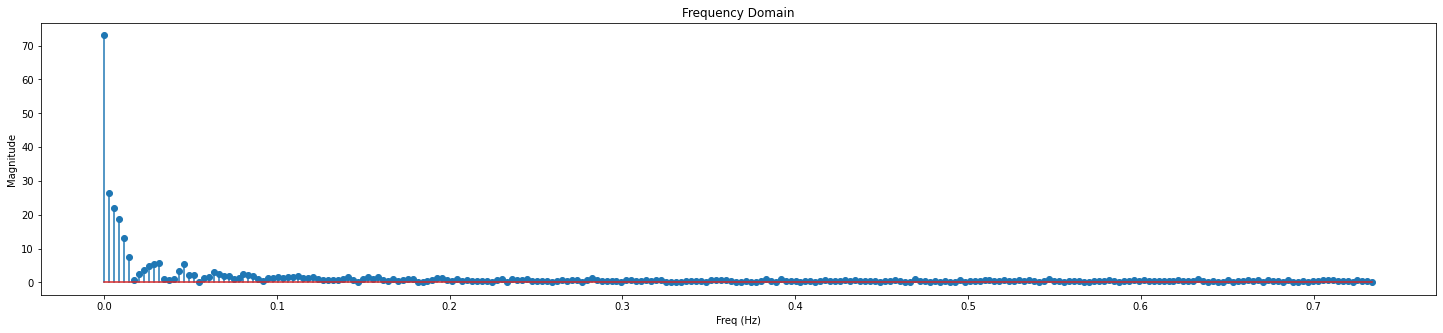

In [ ]:
# for k in range (0,(np.size(bpm_rr))-1):
#  k = np.arange(0,np.ceil(np.size(bpm_rr)/2),1,dtype=int)
# plot.rcParams["figure.figsize"] = (25,5)
# plot.stem(k*fsHRV/(np.size(D_mag)), D_mag[k])
plot.stem(mag["Frequency"],mag["Magnitude"])
plot.xlabel("Freq (Hz)")
plot.ylabel("Magnitude")
plot.title("Frequency Domain")
plot.show()

In [ ]:
TOTALPOWER=0
TOTALPOWER=np.zeros(ptp)
vlf_ecg=0
vlf_ecg=np.zeros(ptp)
lf_ecg=0
lf_ecg=np.zeros(ptp)
hf_ecg=0
hf_ecg=np.zeros(ptp)

for l in range (ptp-1):

  TP = TOTALPOWER[l] + interval[l] 
  for t in range (round(0.0001*fs),round(0.003*fs)):
    MagDFT1[t]

  for t in range (round(0.003*fs),round(0.04*fs)):
    VLF = vlf_ecg[t] + interval[t]
    MagDFT1[t]

  for t in range (round(0.04*fs),round(0.15*fs)):
    MagDFT1[t]
    LF = lf_ecg[t] + interval[t]

  for t in range (round(0.15*fs),round(0.5*fs)):
    MagDFT1[t]
    HF = hf_ecg[t] + interval[t]

#t = np.arange(round(0.003*fs),round(0.15*fs))
t = np.arange(0,ndat/2,1,dtype=int)
plot.figure(figsize=((10,5)))
plot.stackplot(t*fsHRV/ndat, MagDFT1[t])
plot.xlabel("Freq (Hz)")
plot.ylabel("Magnitude")
plot.title("POWER SPECTRAL DENSITY")
plot.show()

NameError: ignored

**Total Power (TP)**

In [ ]:
TOTALPOWER=0
TOTALPOWER=np.zeros(ptp)
for n in range (ptp-1):
  TP = TOTALPOWER[n] + interval[n]

**Very Low Frequency (VLF)**

In [ ]:
vlf_ecg=0
vlf_ecg=np.zeros(ptp)
for n in (round(0.003*fs) for n in range (round(0.04*fs))):
  VLF = vlf_ecg[n] + interval[n]

**Low Frequency (LF)**

In [ ]:
lf_ecg=0
lf_ecg=np.zeros(ptp)
for n in (round(0.04*fs) for n in range (round(0.15*fs))):
  LF = lf_ecg[n] + interval[n]
LF = (LF/(TP-VLF))

IndexError: ignored

**High Frequency (HF)**

In [ ]:
hf_ecg=0
hf_ecg=np.zeros(ptp)
for n in (round(0.003*fs) for n in range (round(0.04*fs))):
  HF = hf_ecg[n] + interval[n]
HF = (HF/(TP-VLF))

**LF/HF Ratio**

In [ ]:
LF_HF_RATIO = LF/HF

NameError: ignored

**Frequency Domain Analysis Result**

In [ ]:
data = [["LF",LF], 
        ["HF",HF], 
        ["RATIO LF/HF",LF_HF_RATIO]] 

col_names = ["FREQUENCY DOMAIN PARAMETER ANALYSIS","SCORE"] 
print (tabulate(data, headers=col_names))

****